<a href="https://colab.research.google.com/github/Chenjing2022/Chenjing2022/blob/main/Projects/Decision_Tree_coded_model_with_Iris_datasets_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision-Tree-coded-model with Iris-datasets Project**



**Tutors: Karen and Lila**



**Student name: Chenjing Gao** 

**INTRODUCTION**
---

In this worksheet we are going to work with the iris dataset, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

furthermove, we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:


*   Exploratory basic information on iris dataset 

*  divide the data set into 70% of the rows for training and 30% for testing

*  find the mean for each of the 4 size columns

*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)

*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 

*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect

*  use the results of the Gini Index to model a decision tree

*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica

*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify

*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


# **PART 1: EXPLORATORY DATA ANALYSIS ON IRIS DATA SET**

Exploratory Data Analysis (EDA) is a task of analyzing a data with a simple tools from statistics from simple piloting tool ,linear algebra and other techniques. From any given problem it’s most important to do a EDA first.Exploratory means exploring a data being detective. In this part of the project, we take iris dataset and perform various EDA techniques using python which are given below :



*   Inporting libraries and Iris dataset

*   Inspecting and understanding basic information of Iris dataset

*   Visualisaing Data with Countplot

*   Visualisaing Data with Pairplot


**Inporting libraries and dataset** 

In this section we will look at the basic information of Iris data set which is initially provided by Karen for our Data analysis and Python learn purpose.

I will creat some basic plots using Matplotlib, Pandas visualisation and Seaborn to help us better understand the data. 

In [108]:
#importing all libraies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_palette("husl")
import plotly.express as px


#LOADING IRIS DATA
# this is the URL of the dataset, where the data of the iris flower is stored: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv 
# We will assign this link to "url" variable
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

# creating the list of colcumn name(becuase in this CSV file there is not headings)
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

# using pandas to read a csv file into dataframe 
iris_data = pd.read_csv(url, names=names)

iris_data # print iris data

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



*   A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.


*   The dataset shows there are 150 observations with 5 features each(sepal-length, sepal-width, petal-length, petal-width and species)



**iris_data.head()**

In [109]:
# We use iris_data.head() to see the first 5 records of the dataframe
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**iris_data.shape()**

By busing the **shape()** function to find the dimensions of the dataframe. Which return a tuple value of rows and columns. 

In this dataset we have 150 rows/records and 5 columns/features.

In [110]:
iris_data.shape

(150, 5)

**iris_data.info()**

We need to verify the features are of which datatypes. We can use **info()** function to verify the fectures are of which datatypes. 


In [111]:
# the info() function is used to get the overview of data like data type of feature, a number of null values in each column and etc...
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Data insights: 


*   All coumns are not having any missing value

*   Four coulmns are are numerical/float datatype 

*   Only "species" cloumn is of categorical/object datatype


**iris_data.head(10)**

Take a look at the data values in the first 10 records to get an idea of the type of values included

To view the first or last few records of a dataframe, you can also use the methods head and tail

In [112]:
# the function df[:10] is same as df.head(10)
# checking for top 10 fectures of dataset 
first_ten = iris_data[:10]
first_ten


,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In this dataset, there are four features such as sepal length, sepal width, petal length, and petal width and one label (species)

**iris_data.tail(10)**

Use the df.tail(10) or df[-10:] founction to take a look at the data values in the last 10 records to get an idea of the type of values included.

In [113]:
# checking for last 10 recoreds of dataset 
# df[-10:] is same as df.tail(10)
last_ten = iris_data[-10:]
last_ten


,sepal-length,sepal-width,petal-length,petal-width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**iris_data.describe()**

**Describe()** function in pandas used to get the statistics of each feature present in our dataset. Some of the information we get include count, max, min, standard deviation, median, mean, upper and lower quartile values in each of the columns.


In [114]:
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observations:**


*   The data set contains only a small number of records (150).

*   We see that *petal length* has a range 1.0-6.9 and the highest standard daviation in all the 4 features. We can take it as an important feature as a higher standard deviation means a higher variance implying it provides more data than the other features.


*   Sepal width* has the least standard daviation so we can consider it a lower valued feature (gives less information)


**Checking for null/missing values**

In [115]:
#The below function is used to get the total count of null values in each feature
iris_data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

From the above result we can clearly see that there is no any null value in this dataset. So we don't need to wimpute anything in the dataset.

**Checking for duplicate values** 

In [116]:
iris_data.duplicated().sum() # total number of duplicates in the dataset

iris_data[iris_data.duplicated()] #this shows the actual duplicate rows

,sepal-length,sepal-width,petal-length,petal-width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


There are 4 duplicates in our dataset but removing them might break the balance of our dataset as we see that our dataset is balanced as in the describe function for the species column we saw the frequency of 50 which can be further proved by the following line of code.

**value_counts() function**

In [117]:
# using value_counts() function to find out how many unique values there are in the species column
unique_value_count = iris_data["species"].value_counts()
unique_value_count

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

From the below result we can see there are 50 observations of each species (Iris-setosa, Iris-versicolor, Iris-virginica). We should't remove the duplicated values as it might imbalance our dataset, and therefore will prove to be less useful for valuable insights. 

**Countplot for checking frequency**


* **Seaborn.countplot()** method is used to show the counts of observations in each categorical bin using bars.

*  In the plot below, we use ***value_counts()***panda founction to determine the frequency of a category. 

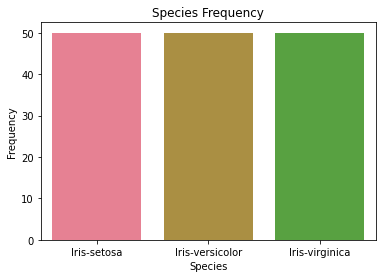

In [118]:
# define the fucntion to show countplot chart
def show_countplot():

  #count the occurrence of each species
  data = iris_data["species"].value_counts()

  # create bar chart
  chart = sns.countplot(x ="species", data = iris_data)
  #set title 
  chart.set_title("Species Frequency")
  #set xlabel 
  chart.set_xlabel("Species")
  #set ylabel
  chart.set_ylabel("Frequency")  

#call the function   
show_countplot()



*   This further visualise that species are well balanced 
*   The countplot chart indicates that each species has 50 samples in the dataset. 



**The images below show different species of Iris flowers**

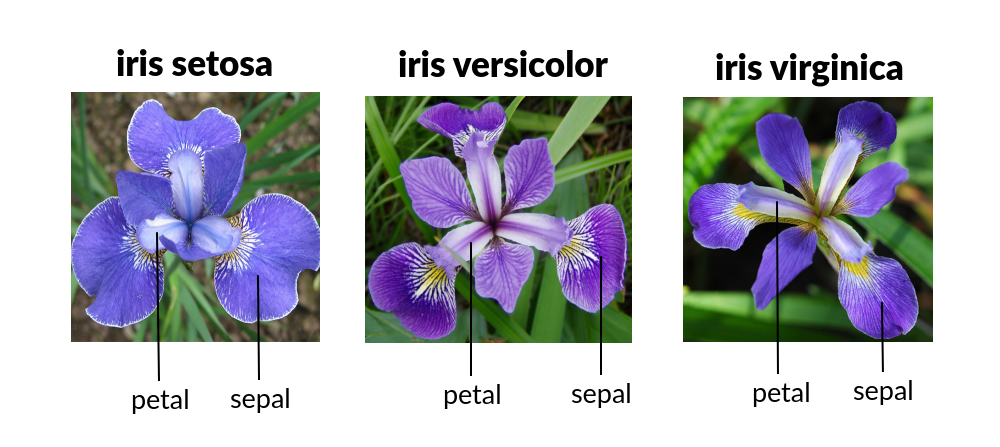

**Pairplot for visualising relations betwee variables**

A pairs plot allows us to see both the distribution of single variables and relationships between two variables. We can plot pair-plot to visualize our data at once. Here we have 4 variables(sepal_length,sepal_width,petal_length,petal_width). we have total pairs is 4C2. pair plots are easy to undersatnd when the dimension of data is small.

To create a pairs plot in Python is to use the ***seaborn.pairplot(df)*** function as shown below.

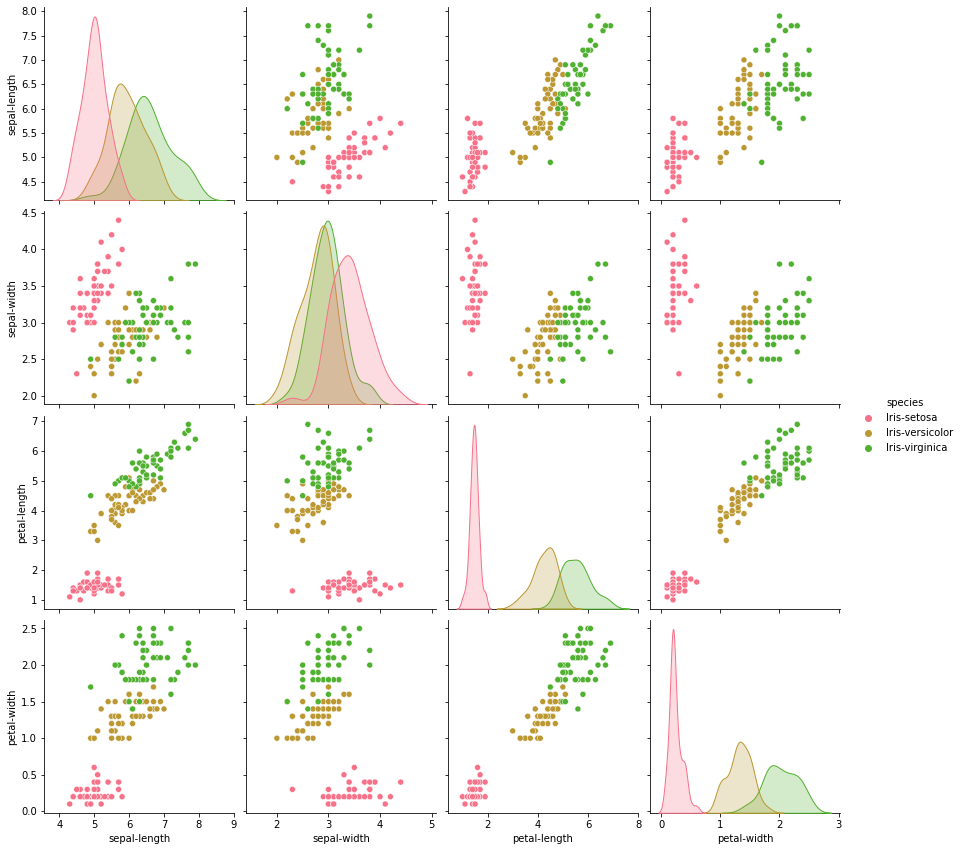

In [119]:
# to visualize the whole dataset
sns.set_palette("husl") # to set the colour for the plots

# define the fucntion to show pairplot 
def show_pairplot():

  #define dataset
  iris_data = sns.iris_data = pd.read_csv(url, names=names)

  #create pairs plot of the iris dataset for all numeric variables
  pairplot = sns.pairplot(iris_data, hue="species", height = 3, diag_kind = "kde")

show_pairplot()

**Observations of Scatter Plot**


To visualize the result, we can consider only the lower or upper part of the plot as they will be the same.


1. Sepal Length

    1.1) sepal-Length vs sepal-width
      * Iris-setosa is almost distinctable while iris-versicolor and iris-verginica are highly colocated

    1.2) sepal-Length vs petal-length
      * Iris-setosa is complelely distinct and iris-versicolor and iris -verginica are almost linearly separable.

    1.3) sepal-Length vs petal-width
      * Iris-setosa again is completely separable while iris-versicolor and riis-verginica are colocated.

2. Sepal Width

    2.1) Sepal Width vs petal-length
      * Iris-setosa is completely separable while iris-versicolor and iris- verginica are colocated.

    2.2) Sepal Width vs petal Width
      * Iris-setosa is completely separable while iris-versicolor and iris -verginica are colocated.

3. Petal Length

  3.1) Petal Length vs Petal Width
      * Iris-steosa is completely separable while irisv-versicolor and iris - verginica are colocated.


**Distplot Inference**

Looking at the frequency distribution we see that :

1.Sepal Length
    Since all the three species are moderately overlapping, we can not separate them with just Sepal Length

2.Sepal Width
    All the three species have similar sepal width.

3.Petal Length
    Iris-setosa has the lowest Petal length while iris-versicolor and iris - verginica have almost similar petal lengths but iris-versicolor has petal lengths less than their verginica cousins.

4.Petal Width

  Iris setosa has the lowest petal width and its cousins, the iris-verginica and iris-versicolor have similar petal widths.



Iris-virginica is the longest flower and iris setosa is the shortest.



# **PART 2: SPLIT THE IRIS DATASET WITH SCIKIT-LEARN'S TRAIN_TEST_SPLIT()**

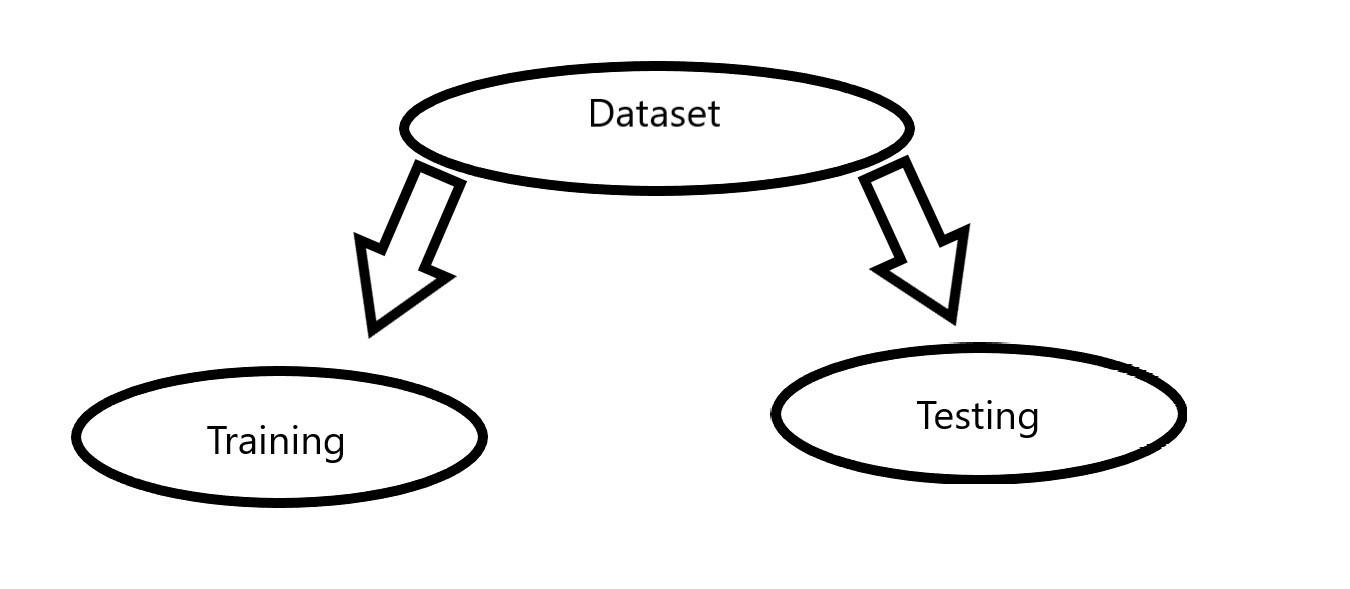

**Training set and testing set**
To assess the model's performance, we show it new data for which we have labels, this is usally done by splitting the data we have collected in this case our 150 flowers measurements into two parts. 

We use the **‘train_test_split’** to split the data in 70:30 ratio i.e. 70% of the data will be used for training the model while 30% will be used for testing the accuracy of the model. 

The following code splits 70% of the data selected randomly into training set and the remaing 30% sample into test data set, and will also write a function to test if the split works. 

In [120]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns (creates two dfs randomly selecting rows for train = 120 rows and test = 30 rows 
train, test = train_test_split(iris_data, test_size=0.3, random_state=2) 
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
## random_state fixes the results of the calculation every time that the whole notebook is run, otherwise it will show different results, due to the random test_size, as it will choose different items every time.

#print(train) # dataset for trainning our model 
#print(test) # dataset for testing our model 

# the code below is to test the split function works or not 
def test_split(df, train_set,test_set):
  expected = (iris_data.shape[0]*70)/100
  actual = train_set.shape[0]
  if actual == expected:
    print("Test past")
  else:
    print("Test failed")
  return

test_split(iris_data,train,test)


Test past


We have split our dataset into training and testing data. Another quick way to check the proportion of the train data set we can use train.describe() function as display the below:  

In [121]:
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.887619,3.057143,3.829524,1.220952
std,0.820494,0.442862,1.765749,0.760275
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observations:** 


*  There are 105 date smaple for training our model  
*   The mean has slightly changed due to the split. 
*   Mean values before spliting : 5.843333,	3.054000,	3.758667,	1.198667
*   Mean values after spliting : 5.887619,	3.057143,	3.829524,	1.220952

**Relastionshp between continous variables**

By using the correlation method .corr() we can generate the relationship between each continuous variable:

In [122]:
correlation_matrix = train.corr().round(2)
correlation_matrix

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.00,-0.14,0.86,0.80
sepal-width,-0.14,1.00,-0.47,-0.39
petal-length,0.86,-0.47,1.00,0.96
petal-width,0.80,-0.39,0.96,1.00


Correlation tables are a numerical representation of the bivariate relationships in the dataset.

Values closest to 1 mean the variables are positively correlated with each other with 1 meaning 100% correlated.

Values close to -1 mean the variables are negatively correlated with each other with -1 meaning 100% negatively correlated.

We can visulise these results in a heatmap.

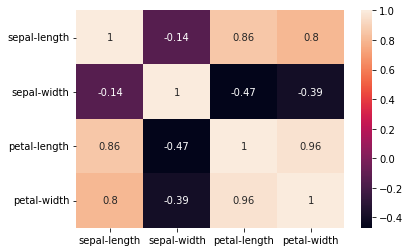

In [123]:
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

The above heatmap shows there is a very strong correlation between petal-length and petal-width valued for 0.96 followed by a postive correlation between petal-length and sepal-length pointed 0.86.

The heatmap also outputs that petal-length is not related to sepal-width with the result of -0.47. 

## **PART 3:  ASSUMPTIONS AND CLASSIFICATION** 

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species. By doing so, I will work through the following steps: 



*   In this worksheet the *mean values* will be used as an indicator. Hence, first we need to calculate, and store the means of the four columns



*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




**3.1: Calculate, and store the means/indicators of the four columns** 

In [124]:
# to calculate, and store the means of the four columns

def calculate_mean(train, column):
  mean = train[column].mean()
  print(column,"=",mean, round(mean,4))
  return mean

sl_indicator = calculate_mean(train,"sepal-length")
sw_indicator = calculate_mean(train,"sepal-width")
pl_indicator = calculate_mean(train,"petal-length")
pw_indicator = calculate_mean(train,"petal-width")

# to test train_means by displaying train.describe() function to see the value of the means of the training set.
display(train.describe())


sepal-length = 5.887619047619049 5.8876
sepal-width = 3.0571428571428556 3.0571
petal-length = 3.8295238095238098 3.8295
petal-width = 1.220952380952381 1.221


,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.887619,3.057143,3.829524,1.220952
std,0.820494,0.442862,1.765749,0.760275
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


 **3.2**: **Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.**

In [125]:
# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
train_encoded = train #make a copy of train

def encode(df, **kdws):
  key = kdws['key']
  indicator = kdws['indicator']
  if df[key] > indicator:
    return 1
  else:
    return 0
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train_encoded["sepal-length_long"] = train_encoded.apply(encode, axis=1, key="sepal-length", indicator=sl_indicator)
train_encoded["sepal-width_wide"] = train_encoded.apply(encode, axis=1, key="sepal-width", indicator=sw_indicator)
train_encoded["petal-length_long"] = train_encoded.apply(encode, axis=1, key="petal-length", indicator=pl_indicator)
train_encoded["petal-width_wide"] = train_encoded.apply(encode, axis=1, key="petal-width", indicator=pw_indicator)
#train['petal-width_wide'] = train.apply(encode, axis=1, key='petal-width', indicator=train['petal-width'].mean())
#train_encoded

# to create the code to drop the original columns, saving as a new dataframe
train_encoded = train.drop(["sepal-length","sepal-width", "petal-length", "petal-width"  ], axis = 1)
train_encoded

,species,sepal-length_long,sepal-width_wide,petal-length_long,petal-width_wide
134,Iris-virginica,1,0,1,1
28,Iris-setosa,0,1,0,0
65,Iris-versicolor,1,1,1,1
0,Iris-setosa,0,1,0,0
27,Iris-setosa,0,1,0,0
...,...,...,...,...,...
75,Iris-versicolor,1,0,1,1
43,Iris-setosa,0,1,0,0
22,Iris-setosa,0,1,0,0
72,Iris-versicolor,1,0,1,1


Now that our data is encoded and all the values of features lie 0 and 1. 

# **4 - 1:  PROPORTION OF VALUES (CONDITIONED PROBABILITY) on or above THE INDICATOR THAT ARE OF Iris-virginica SPECIES**

In this section we are going to focus on the `Iris-virginica` species. 

We will calculate the probability of a row being ON or ABOVE the indicator (in this case our indicator is mean ) and of a given species at the same time.


The same will be done with the rows being under the indicator and of a given species at the same time.

The calculations will be done for every column.

The steps would be, for example:

step 1: Filter by values in the sepal-length column that ARE  ON or ABOVE the mean (sl_indicator) and the species column being Iris-virginica.

ste 2: Filter by values in the sepal-length column that are on or above the mean (sl_indicator) only.

Divide both results.

Instead of filtering the columns again and repeating the steps above to know which numbers are ON or ABOVE the indicator and NOT of one of the given species, we will do a substraction:

= 1 - (the proportion of those that are Iris virginica)








**On or above the indicator(mean) that ARE of the Iris-virginica**

In [126]:
## calculate the proportion of results where the value is on or above median that are of the Iris-virginica 
sl_vir_above_mean = train[(train["sepal-length"] >= sl_indicator) & (train["species"] == "Iris-virginica")]["sepal-length"].count() / train[train["sepal-length"] >= sl_indicator]["sepal-length"].count()
sw_vir_above_mean = train[(train["sepal-width"] >= sw_indicator) & (train["species"] == "Iris-virginica")]["sepal-width"].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vir_above_mean = train[(train['petal-length'] >= pl_indicator) & (train["species"] == "Iris-virginica")]["petal-length"].count() / train[train["petal-length"] >= pl_indicator]["petal-length"].count()
pw_vir_above_mean = train[(train['petal-width'] >= pw_indicator) & (train["species"] == "Iris-virginica")]["petal-width"].count() / train[train["petal-width"] >= pw_indicator]["petal-width"].count()
print("sepal-length: " ,  sl_vir_above_mean)
print("sepal-width: " , sw_vir_above_mean)
print("petal-length: ", pl_vir_above_mean)
print("petal-width: " , pw_vir_above_mean)

sepal-length:  0.64
sepal-width:  0.23404255319148937
petal-length:  0.5606060606060606
petal-width:  0.6379310344827587


**On or above the indicator(mean) that are NOT of the Iris-virginica**

In [127]:
# calculate the proportion of results where the column is on or above mean that are NOT of the Iris-virginica
not_sl_vir_above_mean = 1 - sl_vir_above_mean
not_sw_vir_above_mean = 1 - sw_vir_above_mean
not_pl_vir_above_mean = 1 - pl_vir_above_mean
not_pw_vir_above_mean = 1 - pw_vir_above_mean
print("sepal-length: " , not_sl_vir_above_mean)
print("sepal-width: " ,  not_sw_vir_above_mean)
print("petal-length: ",  not_pl_vir_above_mean)
print("petal-width: " ,  not_pw_vir_above_mean)



sepal-length:  0.36
sepal-width:  0.7659574468085106
petal-length:  0.43939393939393945
petal-width:  0.3620689655172413


# **4 - 2: PROPORTION OF VALUES (CONDITIONED PROBABILITY) below THE INDICATOR THAT ARE OF Iris-virginica SPECIES**

**Below the indicator(mean) that ARE of the Iris-virginica**


In [128]:
### calculate the proportion of results where the value is BELOW indicator(mean) that ARE of Iris-virginica species
sl_vir_below_mean = train[(train["sepal-length"] < sl_indicator) & (train["species"] == "Iris-virginica")]["sepal-length"].count() / train[train["sepal-length"] < sl_indicator]["sepal-length"].count()
sw_vir_below_mean = train[(train["sepal-width"] < sw_indicator) & (train["species"] == "Iris-virginica")]["petal-length"].count() / train[train["petal-length"] < sw_indicator]["petal-length"].count()
pw_vir_below_mean = train[(train['petal-width'] < pl_indicator) & (train["species"] == "Iris-virginica")]["sepal-width"].count() / train[train['sepal-width'] < pl_indicator]['sepal-width'].count()
pl_vir_below_mean = train[(train['petal-length'] < pw_indicator) & (train["species"] == "Iris-virginica")]["petal-width"].count() / train[train["petal-width"] < pw_indicator]["petal-width"].count()
print("sepal-length: ", sl_vir_below_mean)
print("sepal-width: ", sw_vir_below_mean)
print("petal-length: ", pl_vir_below_mean)
print("petal-width:", pw_vir_below_mean)

sepal-length:  0.09090909090909091
sepal-width:  0.7647058823529411
petal-length:  0.0
petal-width: 0.36633663366336633


**Below the indicator(mean) that are NOT Iris-virginica**


In [129]:
#calculate the proportion of results where the value is BELOW the indicator(mean)that are NOT Iris-virginica
not_sl_vir_below = 1 - sl_vir_below_mean
not_sw_vir_below = 1 - sw_vir_below_mean
not_pl_vir_below = 1 - pl_vir_below_mean
not_pw_vir_below = 1 - pw_vir_below_mean
print("sepal-length: ", not_sl_vir_below)
print("sepal-width: ", not_sw_vir_below)
print("petal-length: ", not_pl_vir_below)
print("petal-width:", not_pw_vir_below)


sepal-length:  0.9090909090909091
sepal-width:  0.23529411764705888
petal-length:  1.0
petal-width: 0.6336633663366337


# **5 - 1: PROPORTION OF VALUES (CONDITIONED PROBABILITY) on or above THE INDICATOR THAT ARE OF  Iris-versicolor SPECIES**

This will be the same as above section 4, but this time we will focus on **Iris-versicolor** species: 


**On or above the indicator(mean) that ARE of the Iris-versicolor**

In [130]:
## calculate the proportion of results where the value is on or above mean  that are of Iris-versicolor species
sl_ver_above_mean = train[(train["sepal-length"] >= sl_indicator) & (train["species"] == "Iris-versicolor")]["sepal-length"].count() / train[train["sepal-length"] >= sl_indicator]["sepal-length"].count()
sw_ver_above_mean = train[(train["sepal-width"] >= sw_indicator) & (train["species"] == "Iris-versicolor")]["sepal-width"].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_ver_above_mean = train[(train['petal-length'] >= pl_indicator) & (train["species"] == "Iris-versicolor")]["petal-length"].count() / train[train["petal-length"] >= pl_indicator]["petal-length"].count()
pw_ver_above_mean = train[(train['petal-width'] >= pw_indicator) & (train["species"] == "Iris-versicolor")]["petal-width"].count() / train[train["petal-width"] >= pw_indicator]["petal-width"].count()
print("sepal-length: " ,  sl_ver_above_mean)
print("sepal-width: " , sw_ver_above_mean)
print("petal-length: ", pl_ver_above_mean)
print("petal-width: " , pw_ver_above_mean)

sepal-length:  0.36
sepal-width:  0.14893617021276595
petal-length:  0.4393939393939394
petal-width:  0.3620689655172414


In [131]:
# calculate the proportion of results where the column is on or above mean that are NOT of the Iris-versicolor
not_sl_ver_above_mean = 1 - sl_ver_above_mean
not_sw_ver_above_mean = 1 - sw_ver_above_mean
not_pl_ver_above_mean = 1 - pl_ver_above_mean
not_pw_ver_above_mean = 1 - pw_ver_above_mean

print("sepal-length: " , not_sl_ver_above_mean)
print("sepal-width: " ,  not_sw_ver_above_mean)
print("petal-length: ",  not_pl_ver_above_mean)
print("petal-width: " ,  not_pw_ver_above_mean)

sepal-length:  0.64
sepal-width:  0.851063829787234
petal-length:  0.5606060606060606
petal-width:  0.6379310344827587


# **5 - 2: PROPORTION OF VALUES (CONDITIONED PROBABILITY) below THE INDICATOR THAT ARE OF Iris-versicolor SPECIES**

**Below the indicator(mean) that ARE of the Iris-versicolor**

In [132]:
### calculate the proportion of results where the value is BELOW indicator(mean) that ARE of Iris-versicolor species
sl_ver_below_mean = train[(train["sepal-length"] < sl_indicator) & (train["species"] == "Iris-versicolor")]["sepal-length"].count() / train[train["sepal-length"] < sl_indicator]["sepal-length"].count()
sw_ver_below_mean = train[(train["sepal-width"] < sw_indicator) & (train["species"] == "Iris-versicolor")]["sepal-width"].count() / train[train['sepal-width'] < sw_indicator]['sepal-width'].count()
pl_ver_below_mean = train[(train['petal-length'] < pl_indicator) & (train["species"] == "Iris-versicolor")]["petal-length"].count() / train[train["petal-length"] < pl_indicator]["petal-length"].count()
pw_ver_below_mean = train[(train['petal-width'] < pw_indicator) & (train["species"] == "Iris-versicolor")]["petal-width"].count() / train[train["petal-width"] < pw_indicator]["petal-width"].count()
print("sepal-length: " , sl_ver_below_mean)
print("sepal-width: " , sw_ver_below_mean)
print("petal-length: ", pl_ver_below_mean)
print("petal-width: " , pw_ver_below_mean)

sepal-length:  0.3090909090909091
sepal-width:  0.4827586206896552
petal-length:  0.15384615384615385
petal-width:  0.2978723404255319


**Below the indicator(mean) that are NOT Iris-versicolor**

In [133]:
#calculate the proportion of results where the value is BELOW the indicator(mean)that are NOT Iris-versicolor species
not_sl_ver_below_mean = 1 - sl_ver_below_mean
not_sw_ver_below_mean = 1 - sw_ver_below_mean
not_pl_ver_below_mean = 1 - pl_ver_below_mean
not_pw_ver_below_mean = 1 - pw_ver_below_mean
print("sepal-length: " , not_sl_ver_below_mean)
print("sepal-width: " , not_sw_ver_below_mean)
print("petal-length: ", not_pl_ver_below_mean)
print("petal-width: " , not_pw_ver_below_mean)

sepal-length:  0.6909090909090909
sepal-width:  0.5172413793103448
petal-length:  0.8461538461538461
petal-width:  0.7021276595744681


In section 6, we will work out the Iris-setosa as we did in section 4 and 5.  

# **6 - 1:PROPORTION OF VALUES (CONDITIONED PROBABILITY) on or above THE INDICATOR THAT ARE OF Iris-setosa SPECIES**


**On or above the indicator(mean) that ARE of the Iris-setosa**

In [134]:
## calculate the proportion of results where the value is on or above median that are of Iris-setosa species
sl_set_above_mean = train[(train["sepal-length"] >= sl_indicator) & (train["species"] == "Iris-setosa")]["sepal-length"].count() / train[train["sepal-length"] >= sl_indicator]["sepal-length"].count()
sw_set_above_mean = train[(train["sepal-width"] >= sw_indicator) & (train["species"] == "Iris-setosa")]["sepal-width"].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_set_above_mean = train[(train['petal-length'] >= pl_indicator) & (train["species"] == "Iris-setosa")]["petal-length"].count() / train[train["petal-length"] >= pl_indicator]["petal-length"].count()
pw_set_above_mean = train[(train['petal-width'] >= pw_indicator) & (train["species"] == "Iris-setosa")]["petal-width"].count() / train[train["petal-width"] >= pw_indicator]["petal-width"].count()
print("sepal-length: " , sl_set_above_mean)
print("sepal-width: " , sw_set_above_mean )
print("petal-length: ", pl_set_above_mean)
print("petal-width: " , pw_set_above_mean)


sepal-length:  0.0
sepal-width:  0.6170212765957447
petal-length:  0.0
petal-width:  0.0


 **On or above the indicator(mean) that are NOT of the Iris-setosa**

In [135]:
# calculate the proportion of results where the column is on or above mean that are NOT of the Iris-setosa species
not_sl_set_above_mean = 1 - sl_set_above_mean
not_sw_set_above_mean = 1 - sw_set_above_mean
not_pl_set_above_mean = 1 - pl_set_above_mean
not_pw_set_above_mean = 1 - pw_set_above_mean
print("sepal-length: " , sl_set_above_mean)
print("sepal-width: " , sw_set_above_mean )
print("petal-length: ", pl_set_above_mean)
print("petal-width: " , pw_set_above_mean)


sepal-length:  0.0
sepal-width:  0.6170212765957447
petal-length:  0.0
petal-width:  0.0


# **6 - 2: PROPORTION OF VALUES (CONDITIONED PROBABILITY) below THE INDICATOR THAT ARE OF Iris-setosa SPECIES**

**Below the indicator(mean) that are of the Iris-setosa**

In [136]:
### calculate the proportion of results where the value is BELOW indicator(mean) that ARE of  Iris-setosa species
sl_set_below_mean = train[(train["sepal-length"] < sl_indicator) & (train["species"] == " Iris-setosa")]["sepal-length"].count() / train[train["sepal-length"] < sl_indicator]["sepal-length"].count()
sw_set_below_mean = train[(train["sepal-width"] < sw_indicator) & (train["species"] == " Iris-setosa")]["sepal-width"].count() / train[train['sepal-width'] < sw_indicator]['sepal-width'].count()
pl_set_below_mean = train[(train['petal-length'] < pl_indicator) & (train["species"] == " Iris-setosa")]["petal-length"].count() / train[train["petal-length"] < pl_indicator]["petal-length"].count()
pw_set_below_mean = train[(train['petal-width'] < pw_indicator) & (train["species"] == " Iris-setosa")]["petal-width"].count() / train[train["petal-width"] < pw_indicator]["petal-width"].count()
print(sl_set_below_mean)
print(sw_set_below_mean)
print(pl_set_below_mean)
print(pw_set_below_mean)

0.0
0.0
0.0
0.0


**Below the indicator(mean) that are NOT of the Iris-setosa**

In [137]:
#calculate the proportion of results where the value is BELOW the indicator(mean)that are NOT Iris-setosa species
not_sl_set_below_mean = 1 - sl_set_below_mean
not_sw_set_below_mean = 1 - sw_set_below_mean
not_pl_set_below_mean = 1 - pl_set_below_mean
not_pw_set_below_mean = 1 - pw_set_below_mean
print(not_sl_set_below_mean)
print(not_sw_set_below_mean)
print(not_pl_set_below_mean)
print(not_pw_set_below_mean)

1.0
1.0
1.0
1.0


# **PART 7: CALCULATE GINI INDEX OF THE ABOVE AND BELOW PARRTS, BY SPECIES (NOT OF THE CLOUMN).**

Each time we split the data set into train and test, we will get a slightly different mix and so our train data set will be slightly different ( this is becuase the data has been splitted randomly.) We are going to try to look at how well we might predict a particular species from the 3 columns. Let's use the Iris-virginica species and try to predict if a row would be that species or not, based on the four dimensions columns.

A Gini Index is a measure of the probability of a randomly chosen prediction being incorrect. The most influential column will have the lowest Gini Index and that will be put at the top of our decision tree.

The Gini Index is calculated by subtracting the sum of the squared probabilities of each class from one. 


Gini Index = 1 - (the sum of the squares of the proportion values calculated above)

To calculate the Gini Index for, will be using the following example:

gini_sl_vir = 1 - (sl_vir_above_mean ^^2 + not_sl_vir_above_mean ^^2) 

**7.1: Gini Index of Iris-virginica**

In [138]:
# calculate the Gini Index for the proportion of those ON or ABOVE mean which are Iris_virginica, for all four columns

gini_sl_vir_above_mean = 1 - (sl_vir_above_mean**2 + not_sl_vir_above_mean**2)
gini_sw_vir_above_mean = 1 - (sw_vir_above_mean**2 + not_sw_vir_above_mean**2)
gini_pl_vir_above_mean = 1 - (pl_vir_above_mean**2 + not_pl_vir_above_mean**2)
gini_pw_vir_above_mean = 1 - (pw_vir_above_mean**2 + not_pw_vir_above_mean**2)

print("sepal-length: " , gini_sl_vir_above_mean)
print("sepal-width: ", gini_sw_vir_above_mean)
print("petal-length: ", gini_pl_vir_above_mean)
print("petal-width: ", gini_pw_vir_above_mean)

sepal-length:  0.4608
sepal-width:  0.35853327297419657
petal-length:  0.492653810835629
petal-width:  0.461950059453032


In [139]:
# calculate the Gini Index for the proportion of those BELOW mean which are Iris_virginica, for all four columns
gini_sl_vir_below_mean = 1 - (sl_vir_below_mean**2 + not_sl_vir_below**2)
gini_sw_vir_below_mean= 1 - (sw_vir_below_mean**2 + not_sw_vir_below**2)
gini_pl_vir_below_mean = 1 - (pl_vir_below_mean**2 + not_pl_vir_below**2)
gini_pw_vir_below_mean = 1 - (pw_vir_below_mean**2 + not_pw_vir_below**2)

print("sepal-length: ", gini_sl_vir_below_mean)
print("sepal-width: ", gini_sw_vir_below_mean)
print("petal-length: ", gini_pl_vir_below_mean)
print("petal-width:", gini_pw_vir_below_mean)

sepal-length:  0.16528925619834722
sepal-width:  0.3598615916955017
petal-length:  0.0
petal-width: 0.4642682089991177


**7.2: Gini Index of Iris- Iris-versicolor**

In [140]:
# calculate the Gini Index for the proportion of those ON or ABOVE above mean which are Iris_versicolor, for all four columns

gini_sl_ver_above_mean = 1 - (sl_ver_above_mean**2 + not_sl_ver_above_mean**2)
gini_sw_ver_above_mean = 1 - (sw_ver_above_mean**2 + not_sw_ver_above_mean**2)
gini_pl_ver_above_mean = 1 - (pl_ver_above_mean**2 + not_pl_ver_above_mean**2)
gini_pw_ver_above_mean = 1 - (pw_ver_above_mean**2 + not_pw_ver_above_mean**2)

print("sepal-length: " , gini_sl_ver_above_mean)
print("sepal-width: " ,  gini_sw_ver_above_mean)
print("petal-length: ",  gini_pl_ver_above_mean)
print("petal-width: " ,  gini_pw_ver_above_mean)

sepal-length:  0.4608
sepal-width:  0.25350837483024
petal-length:  0.4926538108356291
petal-width:  0.461950059453032


In [141]:
# calculate the Gini Index for the proportion of those BELOW mean which are Iris_versicolor, for all four columns
gini_sl_ver_below_mean = 1 - (sl_ver_below_mean**2 + not_sl_ver_below_mean**2)
gini_sw_ver_below_mean = 1 - (sw_ver_below_mean**2 + not_sw_ver_below_mean**2)
gini_pl_ver_below_mean = 1 - (pl_ver_below_mean**2 + not_pl_ver_below_mean**2)
gini_pw_ver_below_mean = 1 - (pw_ver_below_mean**2 + not_pw_ver_below_mean**2)
print("sepal-length: ", gini_sl_ver_below_mean)
print("sepal-width: ", gini_sw_ver_below_mean)
print("petal-length: ", gini_pl_ver_below_mean)
print("petal-width:", gini_pw_ver_below_mean)

sepal-length:  0.42710743801652895
sepal-width:  0.4994054696789536
petal-length:  0.2603550295857988
petal-width: 0.41828881846989585


**7.3:  Gini Index of Iris setosa**

In [142]:
# calculate the Gini Index for the proportion of those ON or ABOVE mean which are Iris_setosa, for all columns
gini_sl_set_above_mean = 1 - (sl_set_above_mean**2 + not_sl_set_above_mean**2)
gini_sw_set_above_mean = 1 - (sw_set_above_mean**2 + not_sw_set_above_mean**2)
gini_pl_set_above_mean = 1 - (pl_set_above_mean**2 + not_pl_set_above_mean**2)
gini_pw_set_above_mean = 1 - (pw_set_above_mean**2 + not_pw_set_above_mean**2)
print("sepal-length: " , gini_sl_set_above_mean)
print("sepal-width: " , gini_sw_set_above_mean )
print("petal-length: ", gini_pl_set_above_mean)
print("petal-width: " , gini_pw_set_above_mean)

sepal-length:  0.0
sepal-width:  0.47261204164780446
petal-length:  0.0
petal-width:  0.0


In [143]:
# calculate the Gini Index for the proportion of those BELOW mean which are Iris_setosa, for all columns
gini_sl_set_below_mean = 1 - (sl_set_below_mean**2 + not_sl_set_below_mean**2)
gini_sw_set_below_mean = 1 - (sw_set_below_mean**2 + not_sw_set_below_mean **2)
gini_pl_set_below_mean = 1 - (pl_set_below_mean**2 + not_pl_set_below_mean**2)
gini_pw_set_below_mean = 1 - (pw_set_below_mean**2 + not_pw_set_below_mean**2) 
print("sepal-length: ", gini_sl_set_below_mean)
print("sepal-width: ", gini_sw_ver_below_mean)
print("petal-length: ", gini_pl_ver_below_mean)
print("petal-width:", gini_pw_ver_below_mean)

sepal-length:  0.0
sepal-width:  0.4994054696789536
petal-length:  0.2603550295857988
petal-width: 0.41828881846989585


# **PART 8: ADD WEIGHTS TO THE INDEX** 

**8.1: Gini Index of Iris virginica**

In [144]:
# Calculate the weighted Gini Index for sepal-lenght
weighted_gini_sl_vir = sl_vir_above_mean * gini_sl_vir_above_mean + sl_vir_below_mean * gini_sl_vir_below_mean
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vir = sw_vir_above_mean * gini_sw_vir_above_mean + sw_vir_below_mean* gini_sw_vir_below_mean
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vir = pl_vir_above_mean * gini_pl_vir_above_mean+ pl_vir_below_mean * gini_pl_vir_below_mean
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vir = pw_vir_above_mean * gini_pw_vir_above_mean + pw_vir_below_mean * gini_pw_vir_below_mean

print("sepal-length: ", weighted_gini_sl_vir)
print("sepal-width: ", weighted_gini_sw_vir)
print("petal-length: ", weighted_gini_pl_vir)
print("petal-width:", weighted_gini_pw_vir)

sepal-length:  0.3099382960180316
sepal-width:  0.3591003186134246
petal-length:  0.2761847121351253
petal-width: 0.46477073210790154


**8.2: Gini Index of Iris versicolor**

In [145]:
# Calculate the weighted Gini Index for sepal-lenght
weighted_gini_sl_ver = sl_ver_above_mean * gini_sl_ver_above_mean + sl_ver_below_mean * gini_sl_ver_below_mean
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_ver = sw_ver_above_mean * gini_sw_ver_above_mean + sw_ver_below_mean* gini_sw_ver_below_mean
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_ver = pl_ver_above_mean * gini_pl_ver_above_mean+ pl_ver_below_mean * gini_pl_ver_below_mean
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_ver = pw_ver_above_mean * gini_pw_ver_above_mean + pw_ver_below_mean * gini_pw_ver_below_mean

print("sepal-length: ", weighted_gini_sl_ver)
print("sepal-width: ", weighted_gini_sw_ver)
print("petal-length: ", weighted_gini_pl_ver)
print("petal-width:", weighted_gini_pw_ver)

sepal-length:  0.297903026296018
sepal-width:  0.2788488621711594
petal-length:  0.2565237186367804
petal-width: 0.2918544494782458


**8.3: Gini Index of Iris setosa**

In [146]:
# Calculate the weighted Gini Index for sepal-lenght
weighted_gini_sl_set = sl_set_above_mean * gini_sl_set_above_mean + sl_set_below_mean * gini_sl_set_below_mean
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_set = sw_set_above_mean * gini_sw_set_above_mean + sw_set_below_mean* gini_sw_set_below_mean
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_set = pl_set_above_mean * gini_pl_set_above_mean+ pl_set_below_mean * gini_pl_set_below_mean
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_set = pw_set_above_mean * gini_pw_set_above_mean + pw_set_below_mean * gini_pw_set_below_mean

print("sepal-length: ", weighted_gini_sl_set)
print("sepal-width: ", weighted_gini_sw_set)
print("petal-length: ", weighted_gini_pl_set)
print("petal-width:", weighted_gini_pw_set)

sepal-length:  0.0
sepal-width:  0.29161168527204956
petal-length:  0.0
petal-width: 0.0


# **PART 9: MAKING A DECISION TREE FOR Iris-virginica**



Since we bring all the weights of every column that belong to this species: (sepal-length: 0.3099, sepal-width: 0.3591, petal-length: 0.2761 and petal-width: 0.4648) see the below table: 




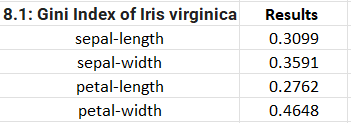





Therefore, the order of the nodes would be: 

1. petal-length
2. sepal-length
3. sepal-width
4. petal-width

The conditional probabilities that we worked out above in section 4 as shown the bellow: 

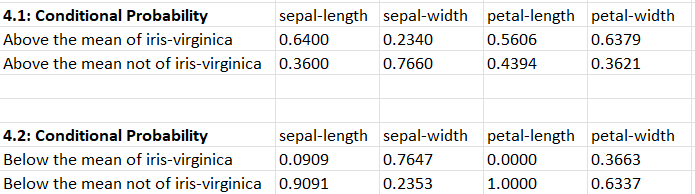











**Petal-length**

  * Since there are 0% occurrences of iris-virginica below the mean this indicates that iris-virginica **definately** has petal-length above the mean.

**Sepal-length**
  
  * There is 90.91% likelyhood that sepal length below the mean is not iris-virginica, whilst there is 64% chance that sepal length above the mean is **probably** iris-virginica. 

**Sepal-width**

*   23% of sepal width above the mean has a probability of being iris-virginica and 76% of sepal width below the mean has a **likelyhood ** of being iris-virginica.

**Petal-width**

*   About 64% of petal width above the mean has a possibility of being the species, and 63% of petal width chance below the mean of the species, so this isn't a reliable measurement to classify the species. 

From above the results, we can conclude that petal-length, sepal-length are above the mean and sepal-width below the mean are most likely to be iris-virginica. Hence, we can plot a simple decision tree for iris-virginica based on these findings. 


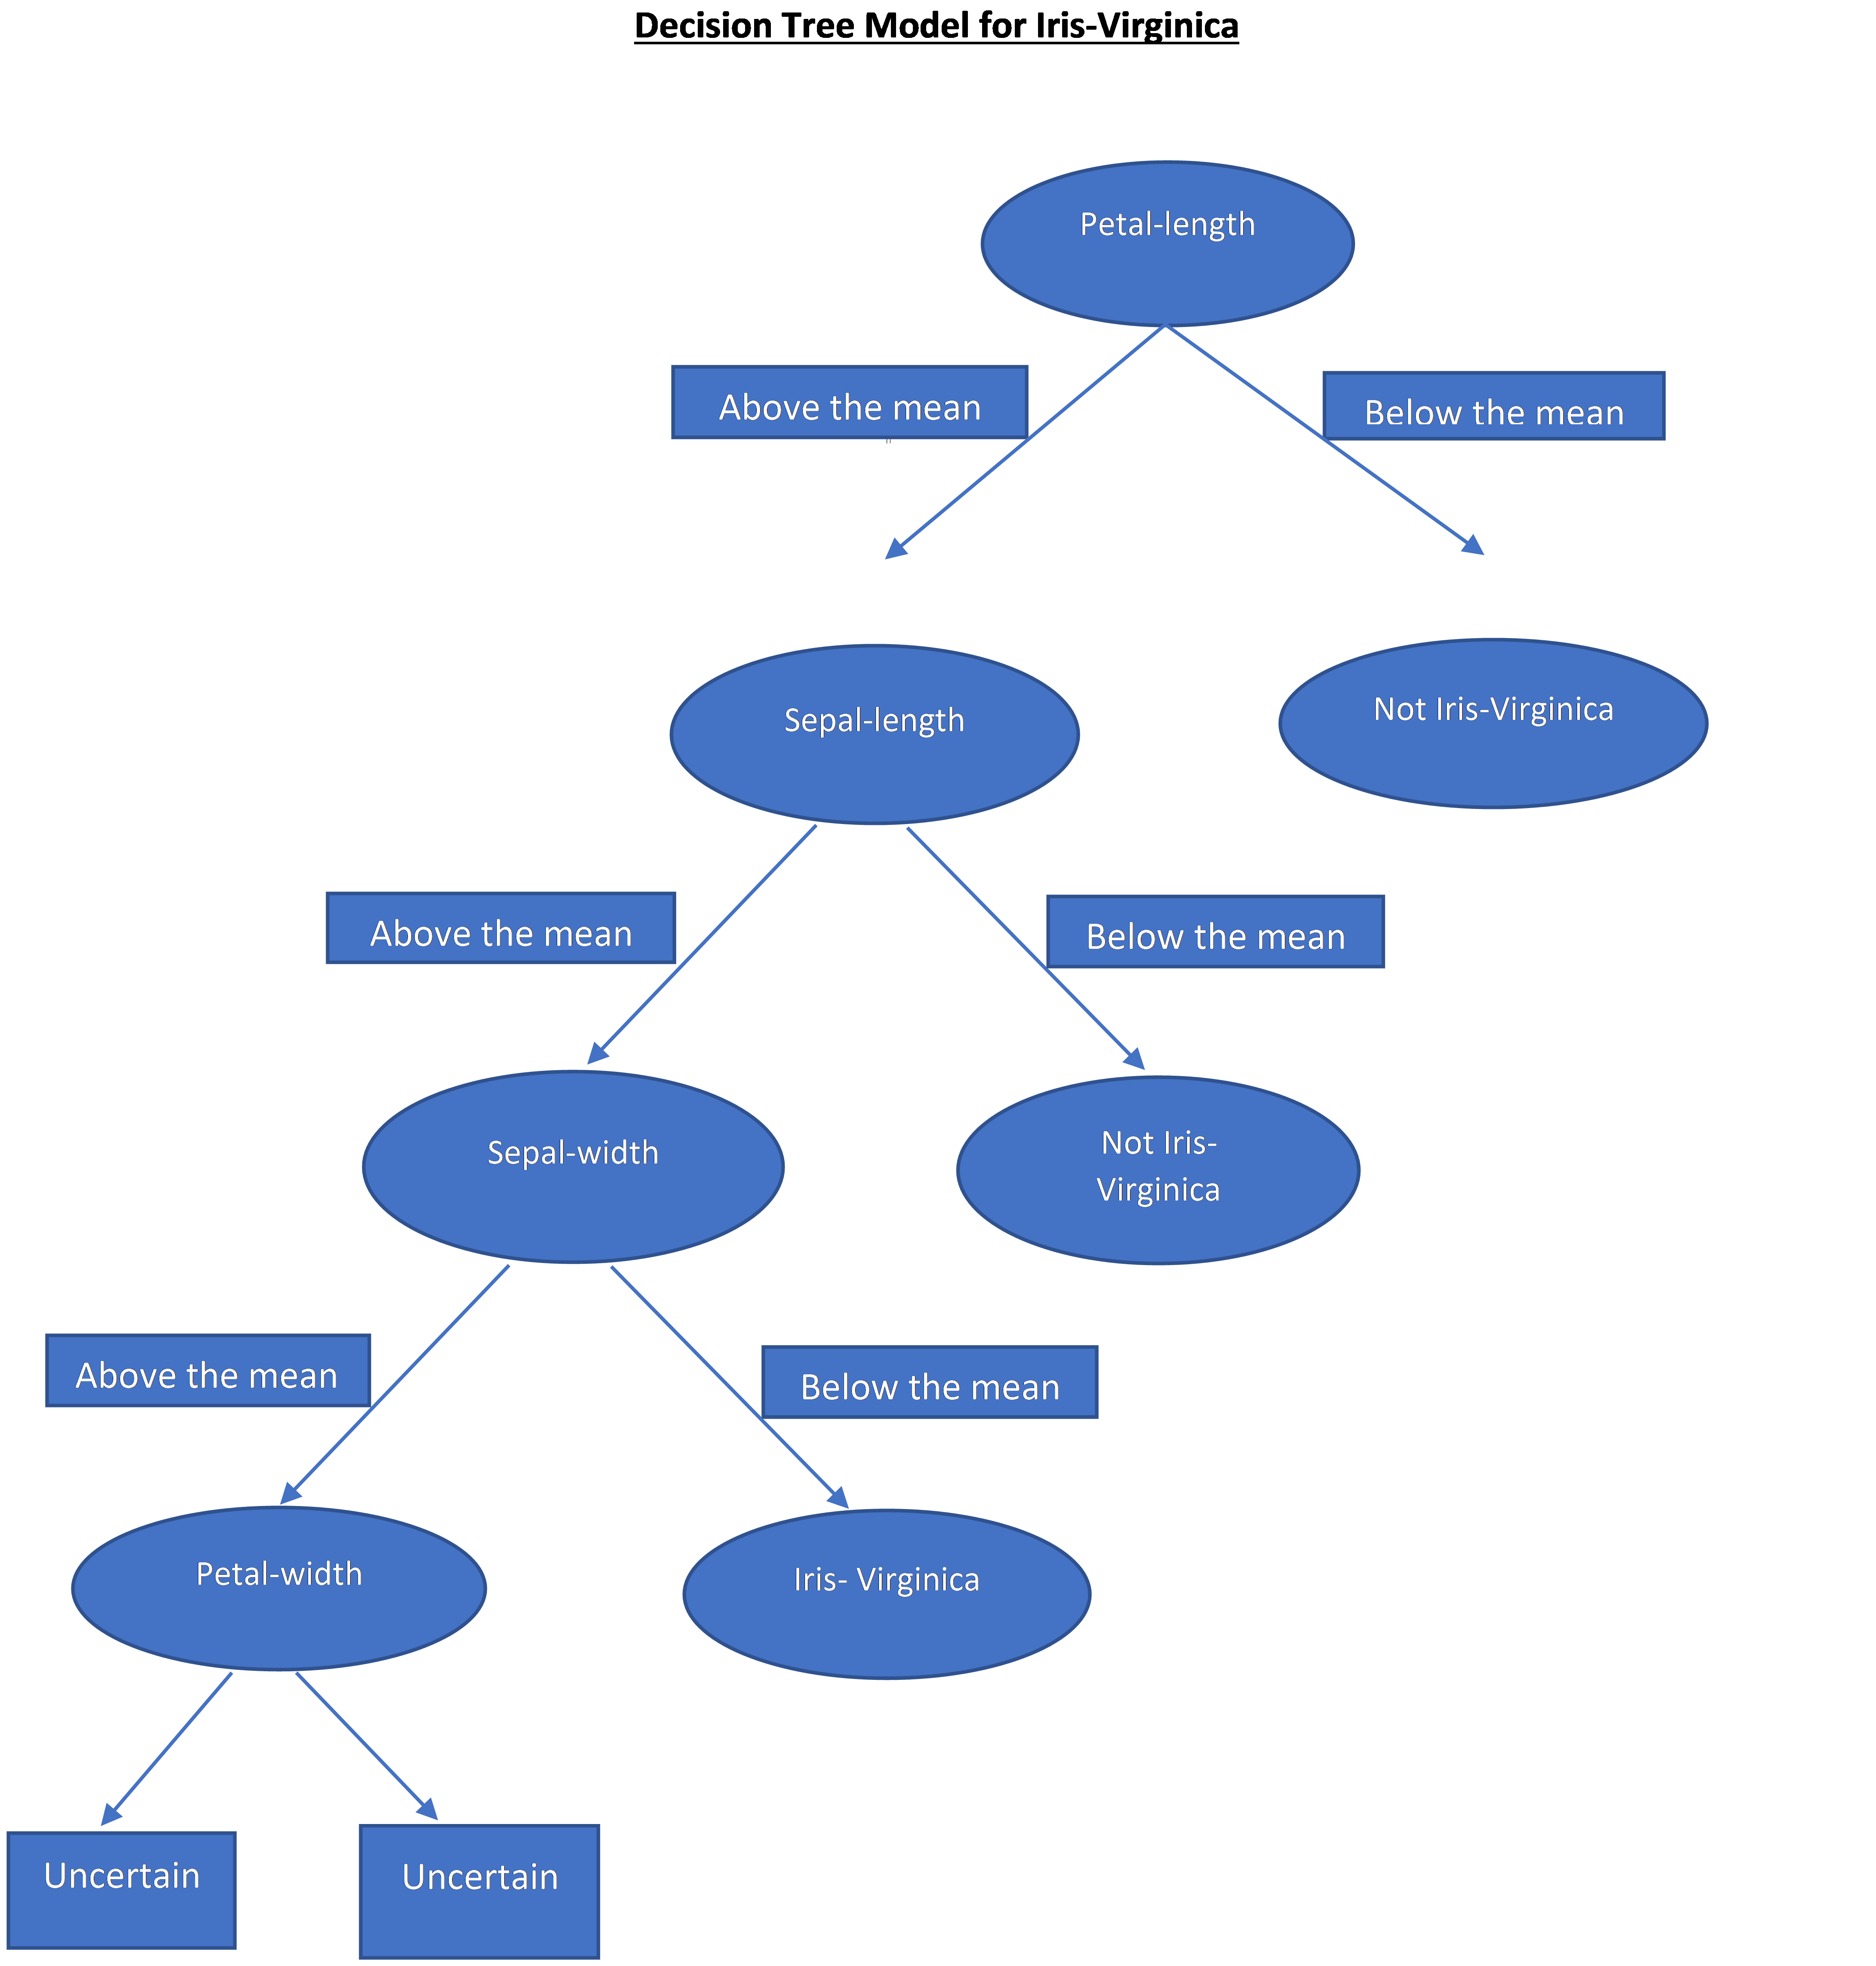

















---




# **PART 10: CHECKING THE MODEL PERFORMANCE**

We shall test efficiency of the decision tree model for Iris-virginica: 

In [147]:
def predict_species(df):
    if df['petal-length'] >= pl_indicator:
      if df['sepal-length'] >= sl_indicator:
        if df['sepal-width'] < sw_indicator:
            return "Iris-virginica" 

        else:
            return None

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = predict_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print("Proportion correctly identified", correct / test_size*100,"%")



Proportion correctly identified 13.333333333333334 %


From above the result we can see that the model get a very low accuracy of 13.33%  proportion of the data set that was correctly identified.  

Next we will be using *median* as an indicator for all four colmuns, let's see if the proportion of correct values will be changed.  


# **PART 11: Change the measurement as Median**

**11.1: Find the median for each of the four columns**

Frist we need to find Medain for the four columns as we did for the mean before. Hence we need to run all the code again using median for the encoding indicator.

In [148]:
# to calculate, and store the Median of the four columns
print(train.describe())

def calculate_median(df, column):
  median = df[column].median()
  print(column,"=",median)
  return median

#print("Median values: ")
sl_median = calculate_median(train,"sepal-length")
sw_median = calculate_median(train,"sepal-width")
pl_median= calculate_median(train,"petal-length")
pw_median = calculate_median(train,"petal-width")


       sepal-length  sepal-width  petal-length  petal-width  \
count    105.000000   105.000000    105.000000   105.000000   
mean       5.887619     3.057143      3.829524     1.220952   
std        0.820494     0.442862      1.765749     0.760275   
min        4.300000     2.000000      1.000000     0.100000   
25%        5.200000     2.800000      1.500000     0.300000   
50%        5.800000     3.000000      4.400000     1.400000   
75%        6.400000     3.400000      5.100000     1.800000   
max        7.900000     4.400000      6.900000     2.500000   

       sepal-length_long  sepal-width_wide  petal-length_long  \
count         105.000000        105.000000         105.000000   
mean            0.476190          0.447619           0.628571   
std             0.501828          0.499634           0.485504   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000

**11.2: Encode the test dataset**

Here we need to encode the test dataset so show a 1 for any value that is above the median for  it column and 0 for any value that isn't.  

In [149]:
test_median = test.copy()
test_median['sepal-length'] = test_median.apply(encode, axis=1, key='sepal-length', indicator=sl_median)
test_median['sepal-width'] = test_median.apply(encode, axis=1, key='sepal-width', indicator=sw_median)
test_median['petal-length'] = test_median.apply(encode, axis=1, key='petal-length', indicator=pl_median)
test_median['petal-width'] = test_median.apply(encode, axis=1, key='petal-width', indicator=pw_median)
test_median.head()

,sepal-length,sepal-width,petal-length,petal-width,species
6,0,1,0,0,Iris-setosa
3,0,1,0,0,Iris-setosa
113,0,0,1,1,Iris-virginica
12,0,0,0,0,Iris-setosa
24,0,1,0,0,Iris-setosa


**11:3: Checking the performance of model on actual test dataset**

Below we will test efficiency of the decision tree model for Iris-virginica by using median values

In [150]:
def get_species(df):
  #RETURN None if petal-length, petal-width is below median (encoded as 0) or if petal-width is below median, 
  #or sepal length is below median, otherwise return 'Iris-virginia'!
    if df['petal-length'] == 0 and df['petal-width'] == 0:
        return None
        if df['sepal-length'] == 0:
          return None

    return 'Iris-virginica' 

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_median_size = test_median.shape[0]
for i in range(0, test_median_size):
  species = get_species(test_median.iloc[i])
  if species == test_median.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", (correct / test_median_size)*100, "%") 


Proportion correctly identified 28.888888888888886 %


From above the result we can clearly see the proportion correctly identified rate is 28.88 which has imporved compare to 13.33% byusing mean values.

# **PART 12: DATA VISULISAION OF THE PETALS**



**12.1: Relationship graph of petal width and length-mean**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



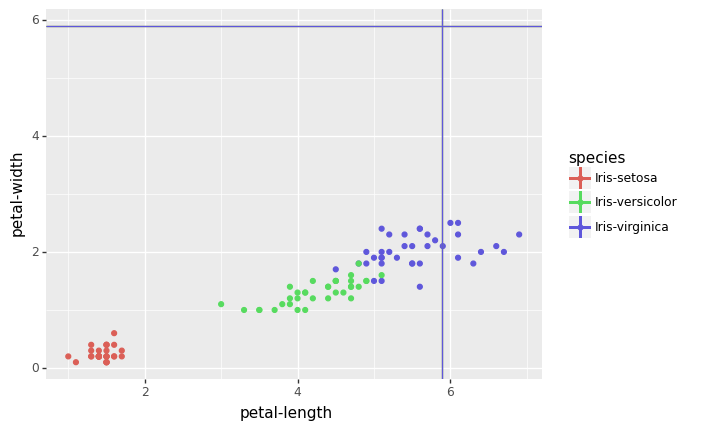

<ggplot: (8788455003693)>

In [151]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x="petal-length", y="petal-width", color="species")) + geom_point()+ geom_vline(train, aes(xintercept=train["sepal-length"].mean(), color="species"))+ geom_hline(train, aes(yintercept=train["sepal-length"].mean(), color="species"))


**12.1: Relationship graph of petal width and length-median**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



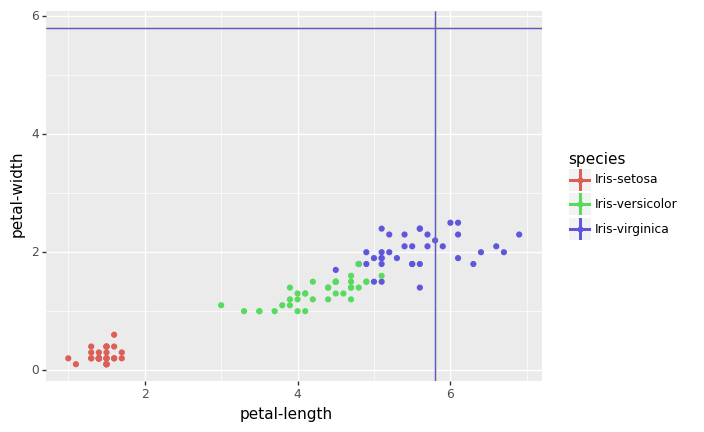

<ggplot: (8788454002073)>

In [152]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x="petal-length", y="petal-width", color="species")) + geom_point()+ geom_vline(train, aes(xintercept=train["sepal-length"].median(), color="species"))+ geom_hline(train, aes(yintercept=train["sepal-length"].median(), color="species"))


# **REFELCTION**

**1. The skills I have demonstrated in completing this notebook are:**

*   Inporting libraries and Iris dataset
*   Inspecting and understanding basic information on  Iris dataset
*   Data cleansing
*   Visualisaing Data with Countplot for checking frequenc
*   Visualisaing Data with Pairplot for visualising relations betwee variables
*   Visualisaing Data with Relastionshp between continous variables
*   Encoded the dataset 
*   Calculateed and store the indicators (means, medians) of the four columns



**2. The new skills I have learnt in completing this notebook are as the below:** 

*   Splitting a data set into train and test sets by using ‘**train_test_split**’ model

*   Adding headings to a CSV if none currently exist

*   calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)

*   infer the proportion of each that are not of that species (using 1 - proportion above). In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species.

*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect

*  use the results of the Gini Index to model a decision tree

*   code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica


*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify

*   Making a decision tree for Iris-virginica 

*   data visulisation of the petals


**3. Further leanring**

* Need to identify other two species  
* Would use quartiles (25 or 75) as an indicator
* Need to understand more concepts of machine learning 




As an overall, this was the most changllage project that I had in the last three months on my learning jouney. I must learn much more about this topic in oreder to produce a better analytical outcome. I am so greatful that I have made a huge progrocess compared to my knowledge 3 months ago. 

